<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Star_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Loading the dataframe

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/6 class csv.csv')

In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# About the dataset

From Kaggle: https://www.kaggle.com/datasets/deepu1109/star-dataset

This CSV file contains a dataset of 240 stars of 6 classes:

Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.

Lo = 3.828 x 10^26 Watts

Ro = 6.9551 x 10^8 m

## Dataset's dimensions

In [5]:
print(f'Number of columns: {df.shape[1]}')
print(f'Number of rows: {df.shape[0]}')

Number of columns: 7
Number of rows: 240


## Dataset's infos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


There are no null value in the intire dataset.

# Column renaming

To make access to dataframe column information, columns are renamed.

In [7]:
df.columns = ['temperature', 'luminosity', 
              'radius', 'absolute_magnitude', 
              'star_type', 'star_color', 'spectral_class']

In [8]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Exploratory analysis

## Column `temperature`

The unit of temperature used in the data for this quantity is the Kelvin (K) scale.

### Average, median and mode

In [9]:
pd.DataFrame({'Average': df['temperature'].mean(),
              'Median': df['temperature'].median(),
              'Mode': df['temperature'].mode()[0]},
             index= ['Values'])

,Average,Median,Mode
Values,10497.4625,5776.0,3600


### Mean absolute deviation, variance and standard deviation

In [10]:
pd.DataFrame({'Mean absolute deviation': df['temperature'].mad(),
              'Variance': df['temperature'].var(),
              'Standard deviation': df['temperature'].std()},
             index= ['Values'])

,Mean absolute deviation,Variance,Standard deviation
Values,7707.765312,9.124882e+07,9552.425037


### Quartiles

In [11]:
pd.DataFrame(df['temperature'].describe()[['25%', '50%', '75%']])

,temperature
25%,3344.25
50%,5776.00
75%,15055.50


### Histogram

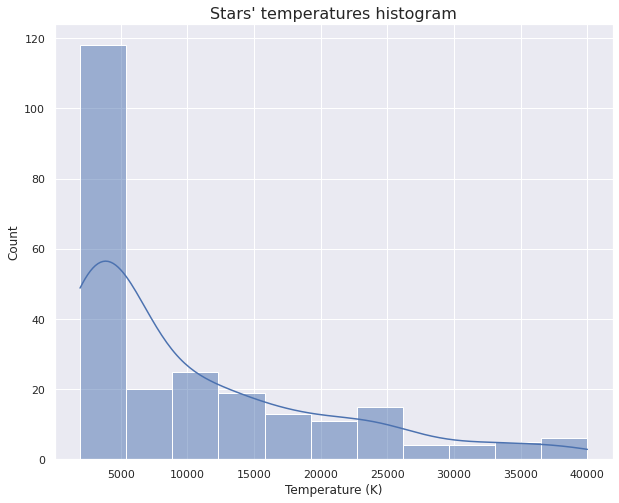

In [12]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', kde= True)
ax.set_title("Stars' temperatures histogram", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

### Boxplot

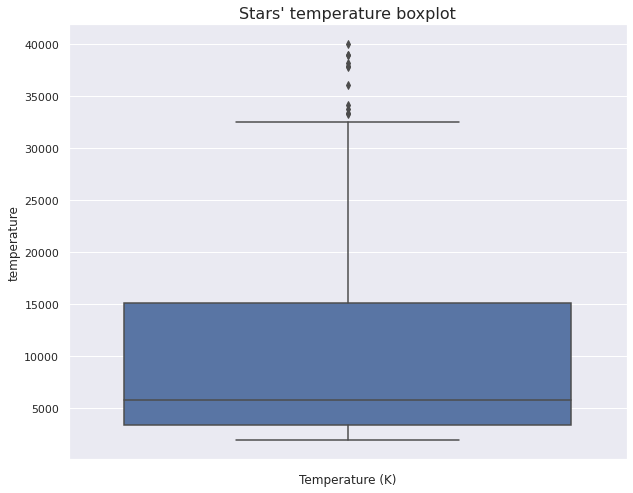

In [13]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'temperature')
ax.set_title("Stars' temperature boxplot", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

## Column `luminosity`

### Average, median and mode

In [14]:
pd.DataFrame({'Average': df['luminosity'].mean(),
              'Median': df['luminosity'].median(),
              'Mode': df['luminosity'].mode()[0]}, 
             index= ['Values'])

,Average,Median,Mode
Values,107188.361635,0.0705,200000.0


### Mean absolute deviation, variance and standard deviation

In [15]:
pd.DataFrame({'Mean deviation': df['luminosity'].mad(),
              'Variance': df['luminosity'].var(),
              'Standard deviation': df['luminosity'].std()},
             index= ['Values'])

,Mean deviation,Variance,Standard deviation
Values,136913.238522,3.219593e+10,179432.24494


### Quartiles

In [16]:
pd.DataFrame(df['luminosity'].describe()[['25%', '50%', '75%']])

,luminosity
25%,0.000865
50%,0.070500
75%,198050.000000


### Histogram

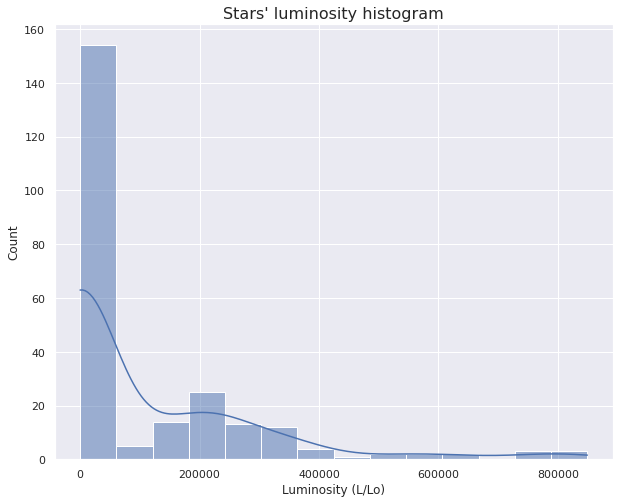

In [17]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', kde= True)
ax.set_title("Stars' luminosity histogram", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

### Boxplot

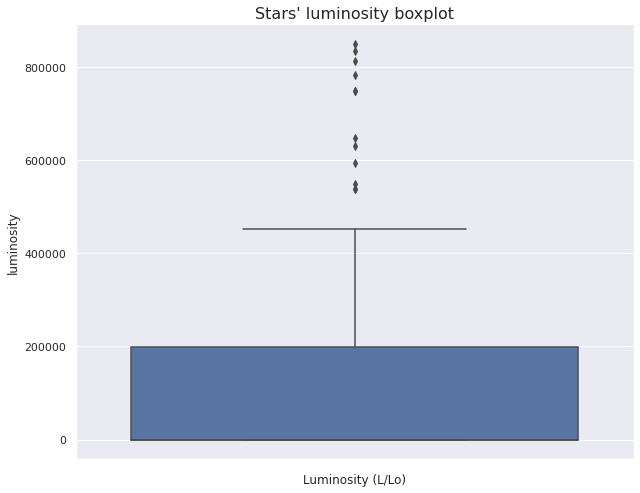

In [18]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data=df, y= 'luminosity')
ax.set_title("Stars' luminosity boxplot", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

## Column `radius`

The data present in the radius variable are determined in relation to the solar radius.

### Average, median and mode

In [19]:
pd.DataFrame({'Average': df['radius'].mean(),
              'Median': df['radius'].median(),
              'Mode': [df['radius'].mode().values]},
             index= ['Values'])

,Average,Median,Mode
Values,237.157781,0.7625,"[0.11, 0.24, 36.0, 1324.0]"


### Mean absolute deviation, variance and standard deviation

In [20]:
pd.DataFrame({'Mean deviation': df['radius'].mad(),
              'Variance': df['radius'].var(),
              'Standard deviation': df['radius'].std()},
             index= ['Values'])

,Mean deviation,Variance,Standard deviation
Values,376.579906,267450.083621,517.155763


### Quartiles

In [21]:
pd.DataFrame(df['radius'].describe()[['25%', '50%', '75%']])

,radius
25%,0.10275
50%,0.76250
75%,42.75000


### Histogram

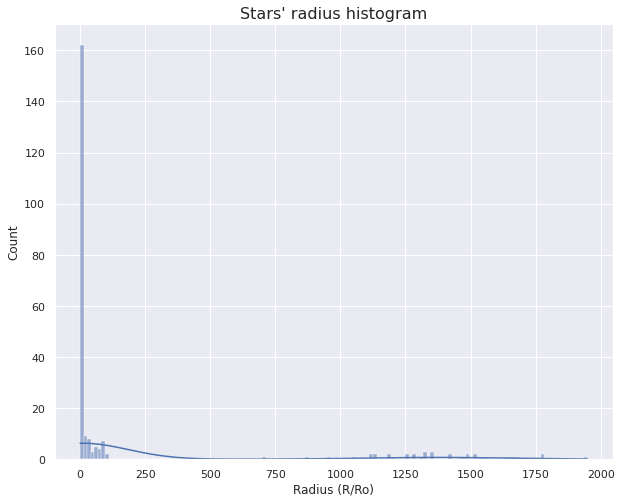

In [22]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'radius', kde= True)
ax.set_title("Stars' radius histogram", fontsize= 16)
plt.xlabel('Radius (R/Ro)')
plt.show()

### Boxplot

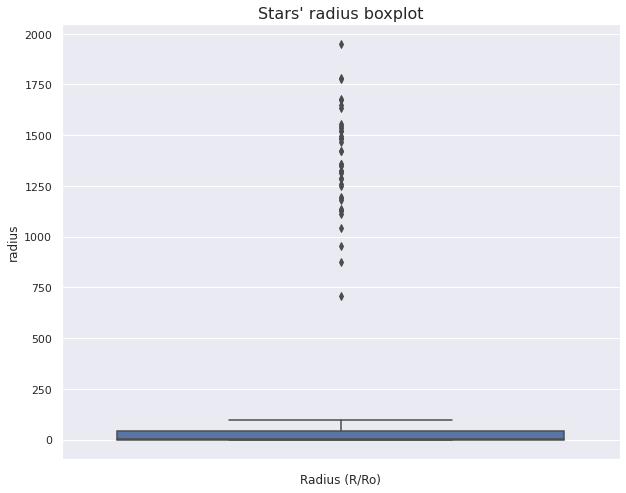

In [23]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'radius')
ax.set_title("Stars' radius boxplot", fontsize= 16)
plt.xlabel('Radius (R/Ro)')
plt.show()

## Column `absolute_magnitude`

It consists of the absolute visual magnitude (Mv) of the stars.

### Average, median and mode

In [24]:
pd.DataFrame({'Average': df['absolute_magnitude'].mean(),
              'Median': df['absolute_magnitude'].median(),
              'Mode': df['absolute_magnitude'].mode()[0]},
             index= ['Values'])

,Average,Median,Mode
Values,4.382396,8.313,12.23


### Mean absolute deviation, variance and standard deviation

In [25]:
pd.DataFrame({'Mean absolute deviation': df['absolute_magnitude'].mad(),
              'Variance': df['absolute_magnitude'].var(),
              'Standard deviation': df['absolute_magnitude'].std()},
             index= ['Values'])

,Mean absolute deviation,Variance,Standard deviation
Values,9.905969,110.933816,10.532512


### Histogram

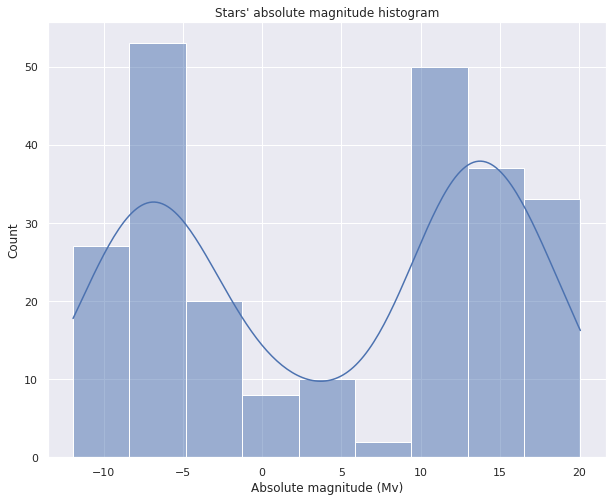

In [26]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'absolute_magnitude', kde= True)
ax.set_title("Stars' absolute magnitude histogram")
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

### Boxplot

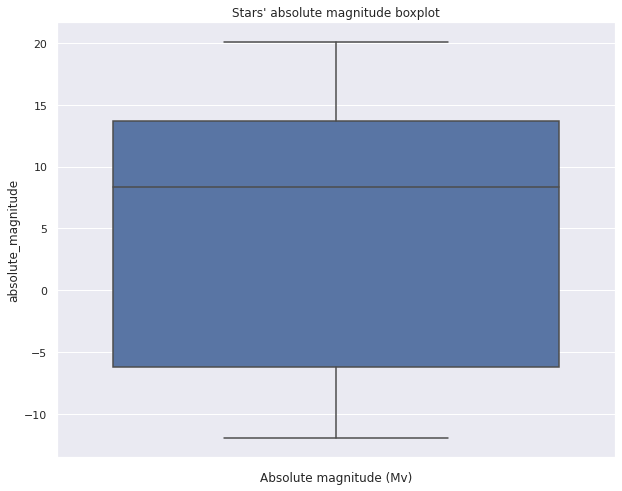

In [27]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'absolute_magnitude')
ax.set_title("Stars' absolute magnitude boxplot")
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

## Column `star_color`

It contains the star's colors after spectral analysis.

In [28]:
f'There are {df["star_color"].nunique()} different types of stars in the database regarding their color.'

'There are 19 different types of stars in the database regarding their color.'

The types are:

In [29]:
df['star_color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

But some of the data appears to have been entered incorrectly. Therefore, it is necessary that they are reset:

In [30]:
df.replace('Blue ', 'Blue', inplace= True)

In [31]:
df.replace('white', 'White', inplace= True)

In [32]:
df.replace(['Blue White', 'Blue white', 'Blue white ', 'Blue-white'], 'Blue-White', inplace= True)

In [33]:
df.replace('yellowish', 'Yellowish', inplace= True)

And for aesthetic reasons to make all types start with capital letters:

In [34]:
df.replace('yellow-white', 'Yellow-White', inplace= True)

After processing the column data, it is observed that:

In [35]:
f'The database contains {df["star_color"].nunique()} different types of stars according to their colors.'

'The database contains 12 different types of stars according to their colors.'

In [36]:
df['star_color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish White',
       'Pale yellow orange', 'Blue', 'Whitish', 'Yellow-White', 'Orange',
       'White-Yellow', 'Yellowish', 'Orange-Red'], dtype=object)

### Stars' color count

In [37]:
count_star_color = pd.DataFrame({'Count': df['star_color'].value_counts(ascending= True)})

In [38]:
count_star_color

,Count
Pale yellow orange,1
White-Yellow,1
Orange-Red,1
Whitish,2
Orange,2
Yellowish White,3
Yellowish,3
Yellow-White,8
White,10
Blue-White,41


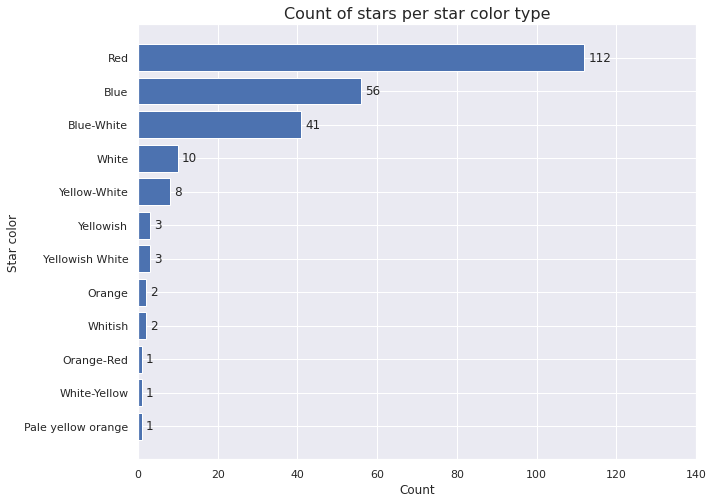

In [39]:
plt.figure(figsize= (10, 8))
bars = plt.barh(count_star_color.index, count_star_color['Count'])

for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 1, index - 0.1, bar.get_width())

plt.title('Count of stars per star color type', fontsize= 16)
plt.xlabel('Count')
plt.ylabel('Star color')
plt.xlim([0, 140])
plt.show()

### How does each variable behave for each type of star? 

#### Temperature

* Mean, median and standard deviation:

In [40]:
df.groupby('star_color').agg(['mean', 'median', 'std'])['temperature']

,mean,median,std
star_color,,,
Blue,21918.339286,19921.5,9453.979609
Blue-White,16659.951220,14100.0,6560.050964
Orange,4018.000000,4018.0,380.423448
Orange-Red,5112.000000,5112.0,NaN
Pale yellow orange,7230.000000,7230.0,NaN
Red,3291.785714,3324.0,490.780761
White,9720.300000,8879.5,2563.623176
White-Yellow,7100.000000,7100.0,NaN
Whitish,8876.000000,8876.0,1165.311975


* Histograms:

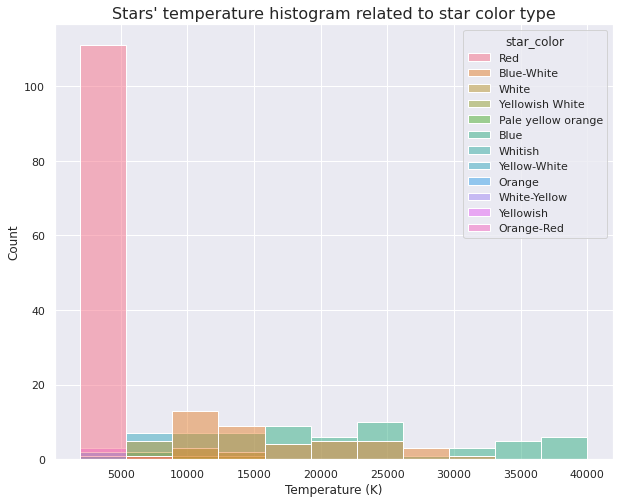

In [41]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', hue= 'star_color')
ax.set_title("Stars' temperature histogram related to star color type", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

* Boxplot

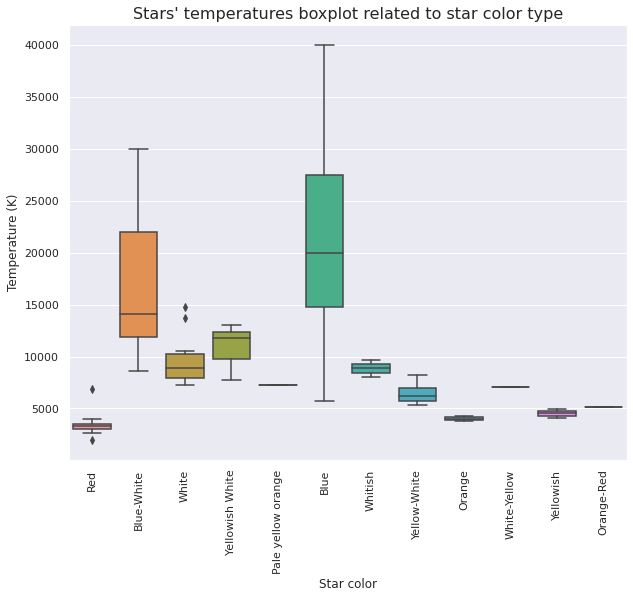

In [42]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'temperature')
ax.set_title("Stars' temperatures boxplot related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Temperature (K)')
plt.xticks(rotation= '90')
plt.show()

The analysis of central tendencies together with the boxplot graph seems to indicate that blue stars tend to have a higher temperature.

#### Luminosity

* Mean, median and standard deviation:

In [43]:
df.groupby('star_color').agg(['mean', 'median', 'std'])['luminosity']

,mean,median,std
star_color,,,
Blue,249974.732446,223890.000000,217947.633816
Blue-White,68904.416521,788.000000,185475.774192
Orange,590000.000000,590000.000000,56568.542495
Orange-Red,0.630000,0.630000,NaN
Pale yellow orange,0.000080,0.000080,NaN
Red,60526.787893,0.002550,104282.874572
White,94243.300229,0.000335,201123.823736
White-Yellow,0.000290,0.000290,NaN
Whitish,41.350000,41.350000,46.174073


* Histogram:

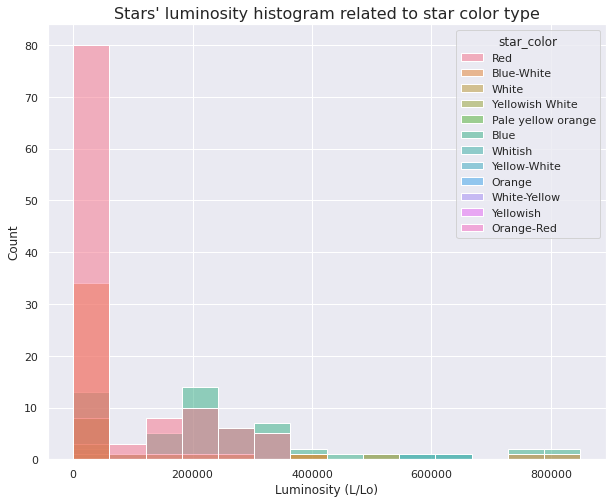

In [44]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', hue= 'star_color')
ax.set_title("Stars' luminosity histogram related to star color type", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

* Boxplot

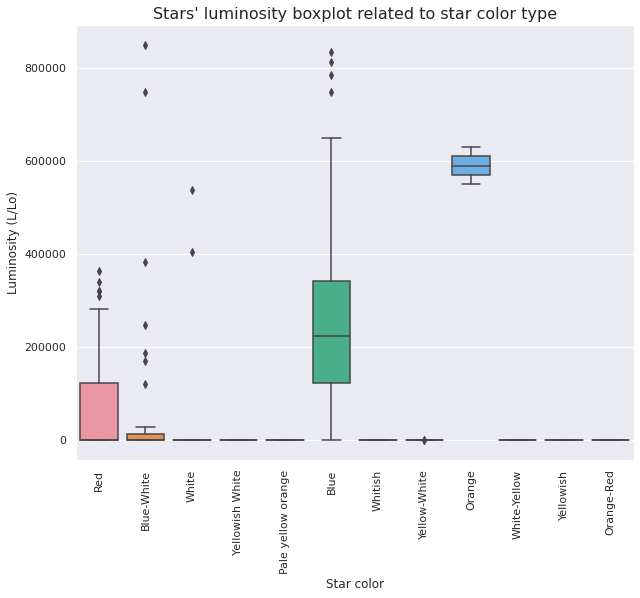

In [45]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'luminosity')
ax.set_title("Stars' luminosity boxplot related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Luminosity (L/Lo)')
plt.xticks(rotation= '90')
plt.show()

A deeper look at orange stars type:

In [46]:
df.query('star_color == "Orange"')

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
53,3749,550000.0,1648.0,-8.05,5,Orange,M
172,4287,630000.0,1315.0,-9.20,5,Orange,K


Measures of central tendency and the boxplot graph indicate that orange stars have greater luminosity. However, there is a very small amount of such stars in the database (2). In addition, they are type 5, that is, hyper giants.

#### Radius

* Mean, median and standard deviation:

In [47]:
df.groupby('star_color').agg(['mean', 'median', 'std'])['radius']

,mean,median,std
star_color,,,
Blue,214.802452,35.50000,495.681463
Blue-White,185.800842,5.74500,464.118298
Orange,1481.500000,1481.50000,235.466558
Orange-Red,0.876000,0.87600,NaN
Pale yellow orange,0.013000,0.01300,NaN
Red,283.529700,0.29900,558.149251
White,253.507866,0.00975,539.424654
White-Yellow,0.012000,0.01200,NaN
Whitish,2.345000,2.34500,0.770746


* Histogram

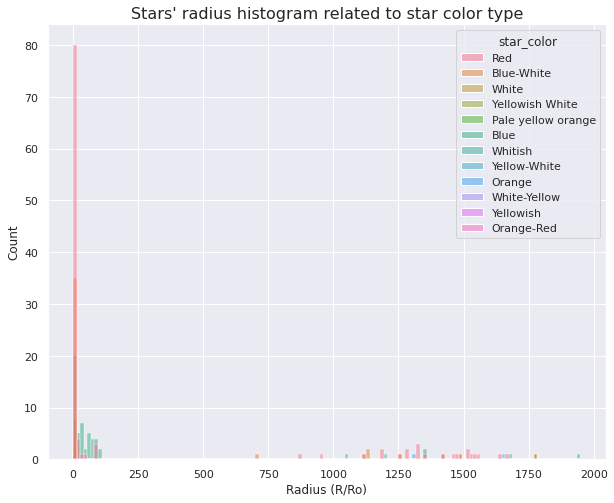

In [48]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'radius', hue= 'star_color')
ax.set_title("Stars' radius histogram related to star color type", fontsize= 16)
plt.xlabel('Radius (R/Ro)')
plt.show()

* Boxplot

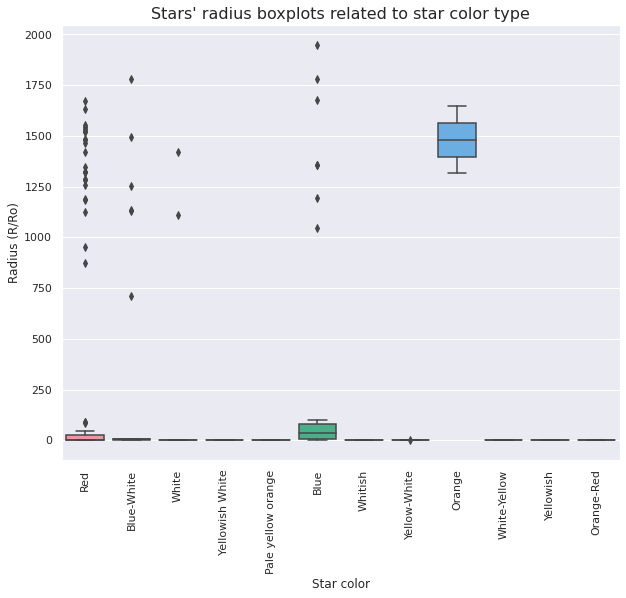

In [49]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'radius')
ax.set_title("Stars' radius boxplots related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Radius (R/Ro)')
plt.xticks(rotation= '90')
plt.show()

There are only two orange stars in the database, both of which are type 5, that is, hyper giants. This can skew the data.

In [50]:
df.groupby('star_color')['star_type'].value_counts()

star_color          star_type
Blue                4            31
                    2            13
                    5             7
                    3             5
Blue-White          3            21
                    2            14
                    5             6
Orange              5             2
Orange-Red          3             1
Pale yellow orange  2             1
Red                 0            40
                    1            40
                    5            23
                    4             9
White               2             8
                    5             2
White-Yellow        2             1
Whitish             3             2
Yellow-White        3             8
Yellowish           3             3
Yellowish White     2             3
Name: star_type, dtype: int64

#### Absolute magnitude

* Mean, median and standard deviation:

In [51]:
df.groupby('star_color').agg(['mean', 'median', 'std'])['absolute_magnitude']

,mean,median,std
star_color,,,
Blue,-2.382446,-5.9825,7.934955
Blue-White,1.968268,-1.3800,8.089971
Orange,-8.625000,-8.6250,0.813173
Orange-Red,4.680000,4.6800,NaN
Pale yellow orange,14.080000,14.0800,NaN
Red,8.173384,13.0950,11.241259
White,8.726000,13.3750,10.420046
White-Yellow,14.090000,14.0900,NaN
Whitish,1.290000,1.2900,1.598061


* Histogram:

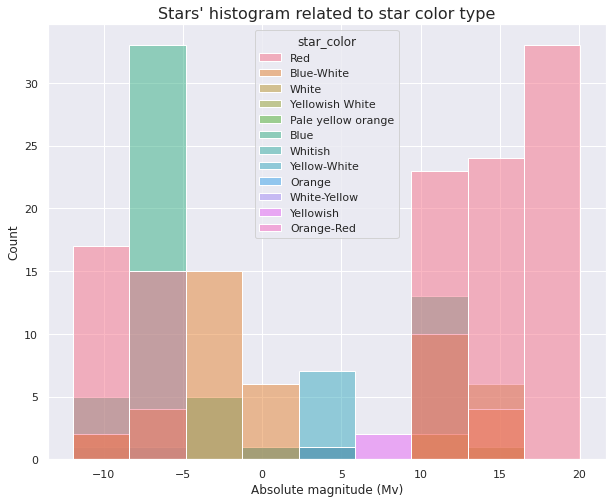

In [52]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'absolute_magnitude', hue= 'star_color')
ax.set_title("Stars' histogram related to star color type", fontsize= 16)
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

* Boxplot

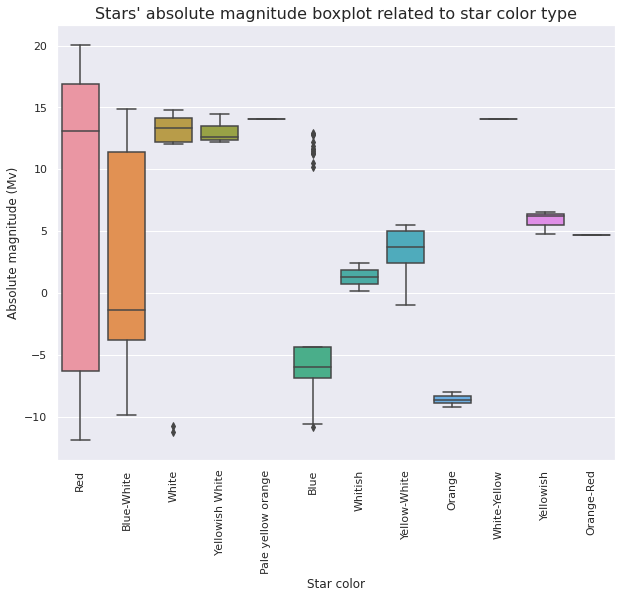

In [53]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'absolute_magnitude')
ax.set_title("Stars' absolute magnitude boxplot related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Absolute magnitude (Mv)')
plt.xticks(rotation= '90')
plt.show()

## Column `spectral_class`

In [54]:
f'There are {df["spectral_class"].nunique()} of stars in terms of spectral class in the database.'

'There are 7 of stars in terms of spectral class in the database.'

The types are:

In [55]:
df['spectral_class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

### Stars' spectral class count

In [56]:
count_spectral_class = pd.DataFrame({'Count': df['spectral_class'].value_counts(ascending= True)})
count_spectral_class

,Count
G,1
K,6
F,17
A,19
O,40
B,46
M,111


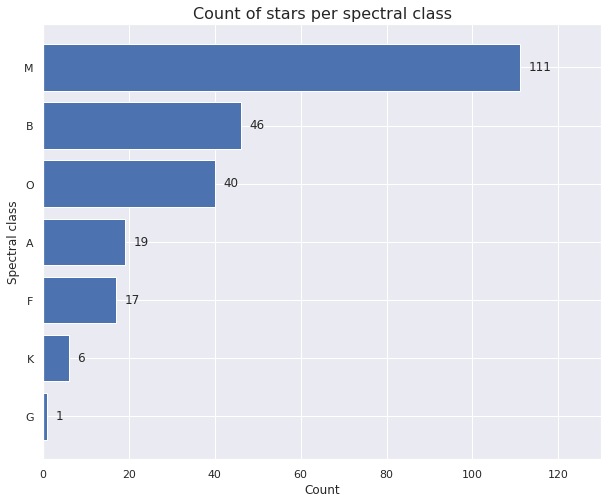

In [57]:
plt.figure(figsize= (10, 8))
bars = plt.barh(count_spectral_class.index, count_spectral_class['Count'])

for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 2, index - 0.05, bar.get_width())

plt.title('Count of stars per spectral class', fontsize= 16)
plt.xlabel('Count')
plt.ylabel('Spectral class')
plt.xlim([0, 130])
plt.show()

### How does each variable behave for each type?

#### Temperature

* Mean, median and standard deviation:

In [58]:
df.groupby('spectral_class').agg(['mean', 'median', 'std'])['temperature']

,mean,median,std
spectral_class,,,
A,9842.368421,9030.0,1913.681972
B,19574.478261,18850.0,6195.248192
F,8516.823529,7230.0,3041.498423
G,6850.000000,6850.0,NaN
K,4499.500000,4406.5,461.549889
M,3257.333333,3324.0,352.000293
O,22294.075000,22369.0,10589.893001


* Histogram:

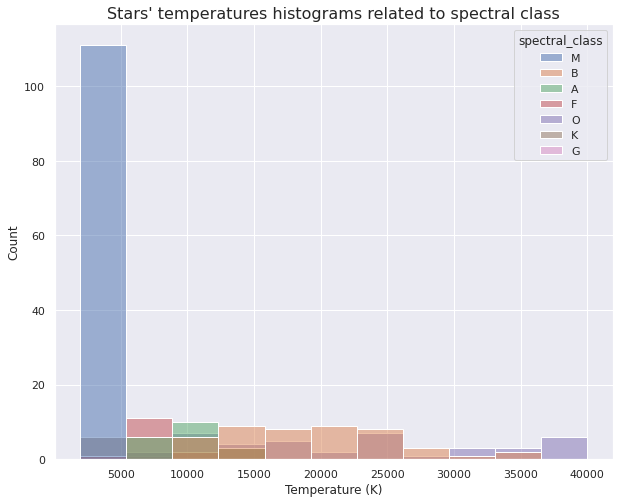

In [59]:
plt.figure(figsize= (10, 8))
sns.histplot(data= df, x= 'temperature', hue= 'spectral_class')
plt.title("Stars' temperatures histograms related to spectral class", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

* Boxplot:

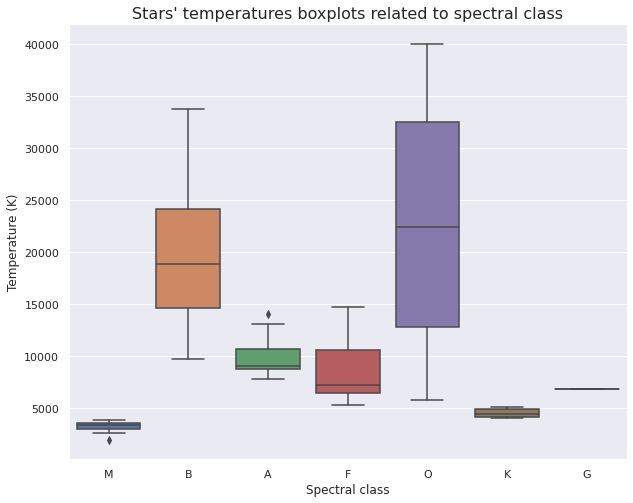

In [60]:
plt.figure(figsize= (10, 8))
sns.boxplot(data= df, x= 'spectral_class', y= 'temperature')
plt.title("Stars' temperatures boxplots related to spectral class", fontsize= 16)
plt.ylabel('Temperature (K)')
plt.xlabel('Spectral class')
plt.show()

#### Luminosity

* Mean, median and standard deviation:

In [61]:
df.groupby('spectral_class').agg(['mean', 'median', 'std'])['luminosity']

,mean,median,std
spectral_class,,,
A,49860.247538,38.00000,150119.273329
B,78179.393322,0.03450,182294.647307
F,1.383960,0.00029,2.773895
G,229000.000000,229000.00000,NaN
K,152000.204167,0.49350,259922.922267
M,61423.425621,0.00240,111566.411903
O,330564.625000,245865.00000,198396.268958


* Histogram:

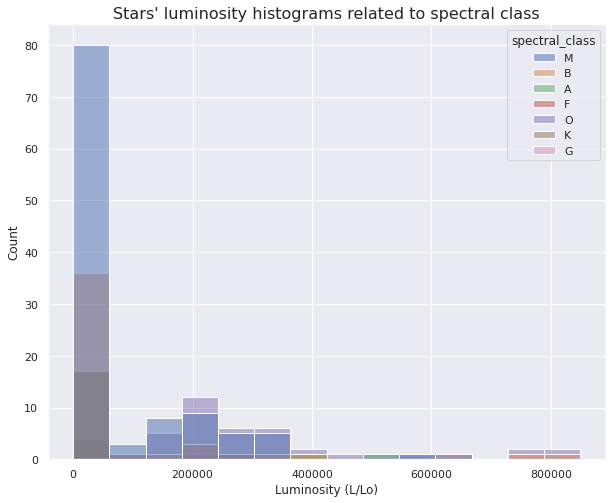

In [62]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', hue= 'spectral_class')
ax.set_title("Stars' luminosity histograms related to spectral class", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

* Boxplot:

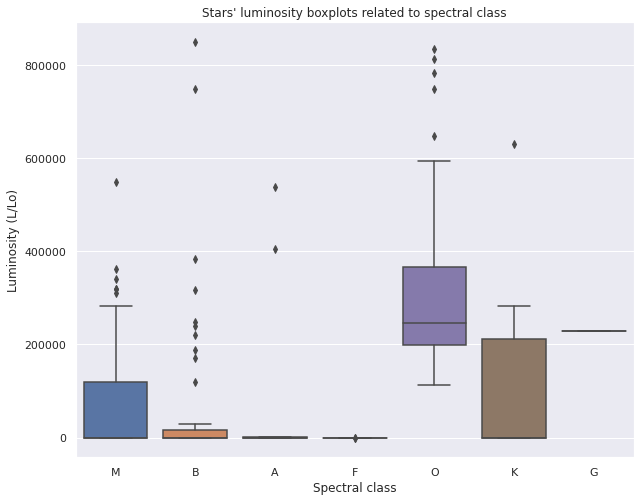

In [63]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'spectral_class', y= 'luminosity')
ax.set_title("Stars' luminosity boxplots related to spectral class")
plt.xlabel('Spectral class')
plt.ylabel('Luminosity (L/Lo)')
plt.show()

#### Radius

* Mean, median and standard deviation:

In [64]:
df.groupby('spectral_class').agg(['mean', 'median', 'std'])['radius']

,mean,median,std
spectral_class,,,
A,135.878422,2.4870,402.142640
B,202.022292,0.0146,493.825127
F,0.551334,0.0130,0.632965
G,1467.000000,1467.0000,NaN
K,475.444333,1.0030,738.390214
M,273.894832,0.2910,551.585254
O,257.794675,57.0000,521.810621


* Histogram:

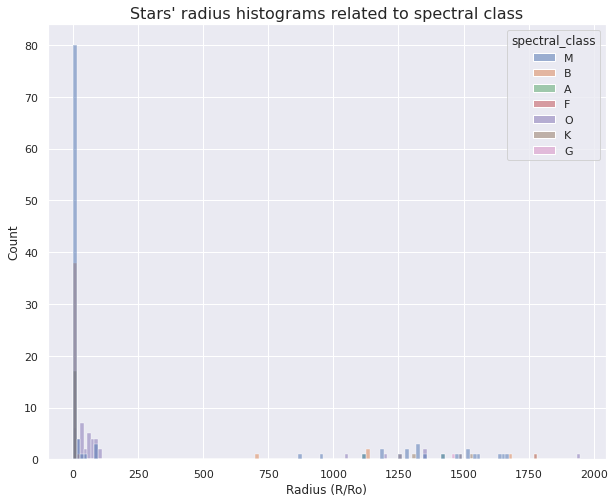

In [65]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'radius', hue= 'spectral_class')
ax.set_title("Stars' radius histograms related to spectral class", fontsize= 16)
plt.xlabel('Radius (R/Ro)')
plt.show()

* Boxplot:

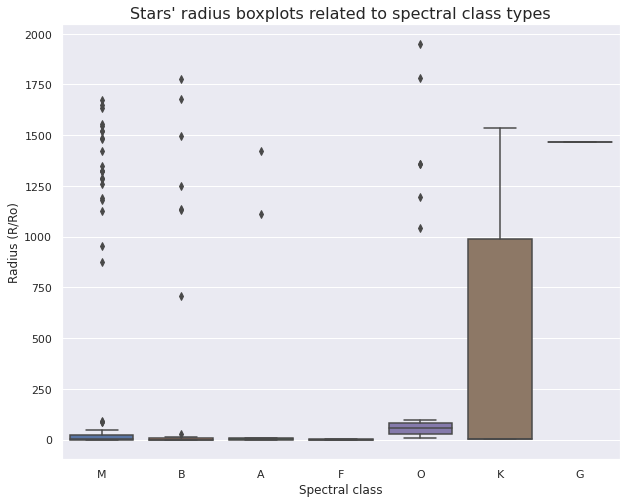

In [66]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'spectral_class', y= 'radius')
ax.set_title("Stars' radius boxplots related to spectral class types", fontsize= 16)
plt.xlabel('Spectral class')
plt.ylabel('Radius (R/Ro)')
plt.show()

#### Absolute magnitude

* Mean, median and standard deviation:

In [67]:
df.groupby('spectral_class').agg(['mean', 'median', 'std'])['absolute_magnitude']

,mean,median,std
spectral_class,,,
A,4.085211,1.236,8.753602
B,3.722609,10.365,8.764962
F,8.611765,12.020,5.344170
G,-10.070000,-10.070,NaN
K,0.267333,4.730,8.243908
M,8.367829,13.120,11.106946
O,-6.596175,-6.235,1.514559


* Histogram:

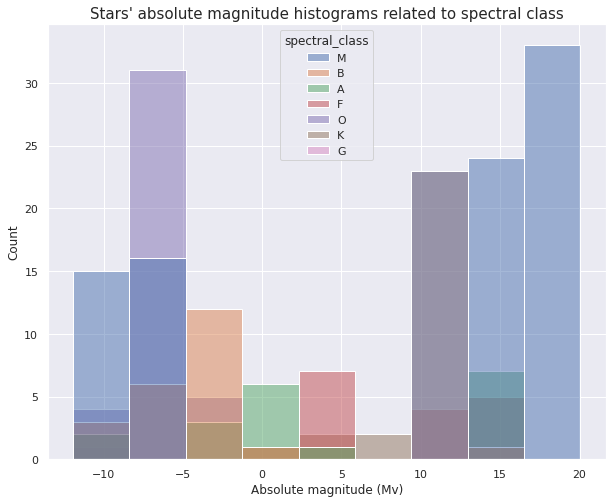

In [68]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'absolute_magnitude', hue= 'spectral_class')
ax.set_title("Stars' absolute magnitude histograms related to spectral class", fontsize= 15)
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

* Boxplot:

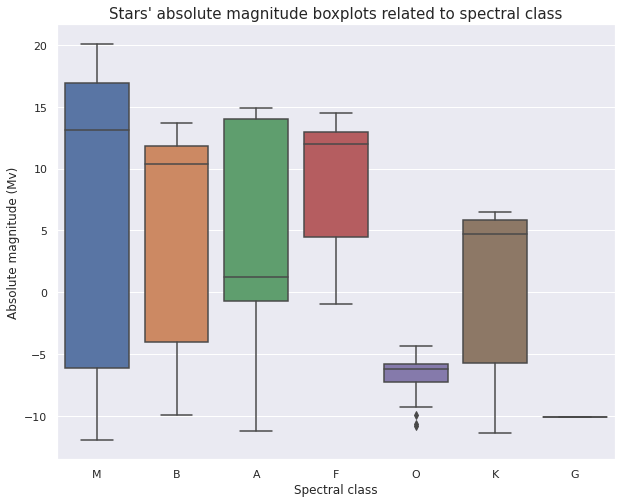

In [69]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'spectral_class', y= 'absolute_magnitude')
ax.set_title("Stars' absolute magnitude boxplots related to spectral class", fontsize= 15)
plt.xlabel('Spectral class')
plt.ylabel('Absolute magnitude (Mv)')
plt.show()

## Column `star_type`

In [70]:
f'There are {df["star_type"].nunique()} different star types in the database.'

'There are 6 different star types in the database.'

The types are:

In [71]:
df['star_type'].unique()

array([0, 1, 2, 3, 4, 5])

### Count

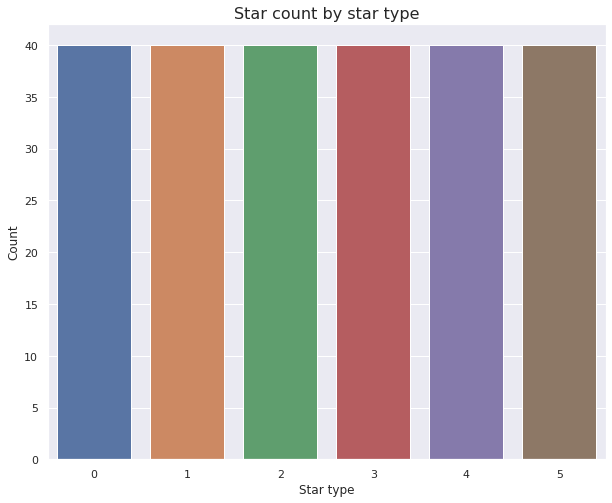

In [72]:
plt.figure(figsize= (10, 8))
ax = sns.countplot(data= df, x= 'star_type', orient= 'horizontal')
ax.set_title('Star count by star type', fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Count')
plt.show()

### Crosstabs

#### `star_type` and `star_color`

In [73]:
pd.crosstab(df['star_color'], df['star_type'])

star_type,0,1,2,3,4,5
star_color,,,,,,
Blue,0,0,13,5,31,7
Blue-White,0,0,14,21,0,6
Orange,0,0,0,0,0,2
Orange-Red,0,0,0,1,0,0
Pale yellow orange,0,0,1,0,0,0
Red,40,40,0,0,9,23
White,0,0,8,0,0,2
White-Yellow,0,0,1,0,0,0
Whitish,0,0,0,2,0,0


#### `star_type` and `spectral_class`

In [74]:
pd.crosstab(df['spectral_class'], df['star_type'])

star_type,0,1,2,3,4,5
spectral_class,,,,,,
A,0,0,7,10,0,2
B,0,0,24,13,2,7
F,0,0,9,8,0,0
G,0,0,0,0,0,1
K,0,0,0,4,0,2
M,40,40,0,0,9,22
O,0,0,0,5,29,6


### How does each variable behave for each type?

#### Temperature

* Mean, median and standard deviation:

In [75]:
df.groupby('star_type').agg(['mean', 'median', 'std'])['temperature']

,mean,median,std
star_type,,,
0,2997.950,2935.0,332.276295
1,3283.825,3314.0,269.637258
2,13931.450,13380.0,4957.655189
3,16018.000,12560.5,10661.234972
4,15347.850,12821.0,10086.784628
5,11405.700,3766.0,11816.991886


* Histogram:

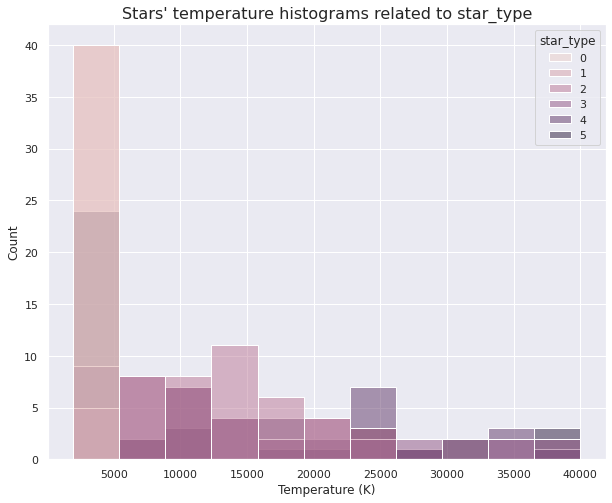

In [76]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', hue= 'star_type')
ax.set_title("Stars' temperature histograms related to star_type", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

* Boxplots:

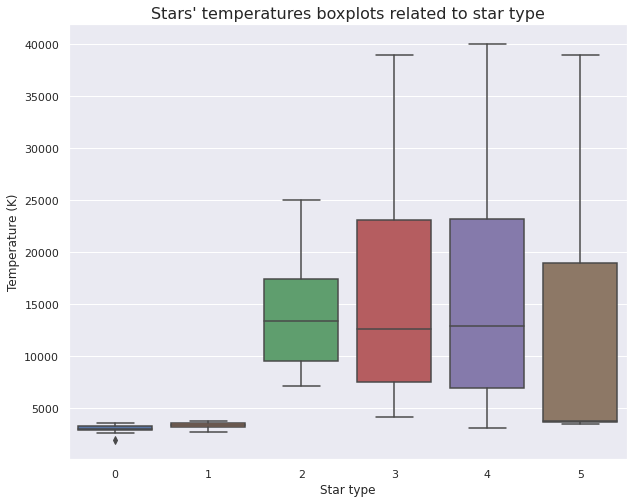

In [77]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_type', y= 'temperature')
ax.set_title("Stars' temperatures boxplots related to star type", fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Temperature (K)')
plt.show()

* Hypothesis test:

The medians of stars of types 2, 3 and 4 are close. Is it possible to say that they are statistically different? 

$md_2 ⇒$ Star type 2 median;

$md_3 ⇒$ Star type 3 median; 

$md_4 ⇒$ Star type 4 median; 

$H_0: md_2 = md_3 = md_4$ 

$H_1:$ At least the median of one of the samples is different. 

Samples:

In [78]:
type_2 = df.query('star_type == 2')['temperature']

In [79]:
type_3 = df.query('star_type == 3')['temperature']

In [80]:
type_4 = df.query('star_type == 4')['temperature']

Since it is not possible to affirm that the variables follow a normal distribution, it is important to carry out non-parametric statistical tests. As we want to compare the medians of more than two samples, we will use the Kruskal-Wallis test.

In [81]:
from scipy.stats import kruskal

In [82]:
stat, pvalue = kruskal(type_2, type_3, type_4)

In [83]:
f'pvalue: {pvalue}'

'pvalue: 0.9912164883701264'

Hypothesis $H_0$ is rejected if $pvalue \leq α$. We assume that $α$ is 5%.

In [84]:
pvalue <= 0.05

False

Since the condition for rejecting the null hypothesis is not satisfied, we fail to reject $H_0$. We assume, therefore, that the medians of the samples are statistically equivalent.

#### Luminosity 

* Mean, median and standard deviation:

In [85]:
df.groupby('star_type').agg(['mean', 'median', 'std'])['luminosity']

,mean,median,std
star_type,,,
0,0.000693,0.00052,0.000888
1,0.005406,0.00315,0.007330
2,0.002434,0.00076,0.008912
3,32067.386275,738.50000,69351.195858
4,301816.250000,242145.00000,175756.378119
5,309246.525000,266500.00000,199343.999427


* Histograms:

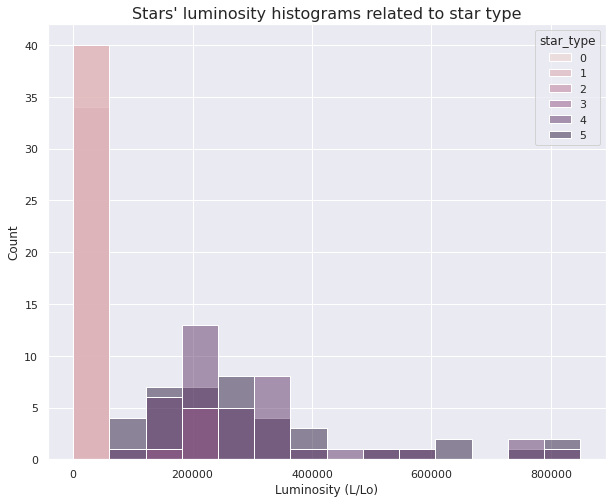

In [86]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', hue= 'star_type')
ax.set_title("Stars' luminosity histograms related to star type", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

* Boxplots:

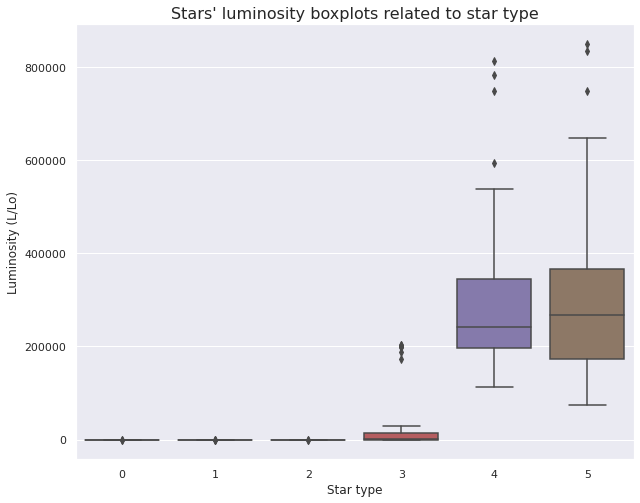

In [87]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_type', y= 'luminosity')
ax.set_title("Stars' luminosity boxplots related to star type", fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Luminosity (L/Lo)')
plt.show()

* Hypothesis test:

The medians of stars of types 4 and 5 are close. Is it possible to say that they are statistically different? 

$md_4 ⇒$ Star type 4 median;

$md_5 ⇒$ Star type 5 median;

$H_0: md_4 = md_5$

$H_1: md_4 \neq md_5$

Samples:

In [103]:
type_4 = df.query('star_type == 4')['luminosity']

In [104]:
type_5 = df.query('star_type == 5')['luminosity']

As the data do not present normal distribution and the same variance, the non-parametric Mann-Whitney test was used.

In [105]:
from scipy.stats import mannwhitneyu

In [107]:
stat, pvalue = mannwhitneyu(type_4, type_5, alternative= 'two-sided')

In [108]:
f'pvalue: {pvalue}'

'pvalue: 0.9577862149892067'

Hypothesis $H_0$ is rejected if $pvalue \leq α$. We assume that $α$ is 5%.

In [109]:
pvalue <= 0.05

False

Since the condition for rejecting the null hypothesis is not satisfied, we fail to reject $H_0$. We assume, therefore, that the medians of the samples are statistically equivalent.

#### Radius

* Mean, median and standard deviation:

In [111]:
df.groupby('star_type').agg(['mean', 'median', 'std'])['radius']

,mean,median,std
star_type,,,
0,0.110015,0.1060,0.025783
1,0.348145,0.3380,0.154453
2,0.010728,0.0102,0.001725
3,4.430300,5.7125,2.801390
4,51.150000,43.5000,27.656826
5,1366.897500,1352.5000,255.561357


* Histograms:

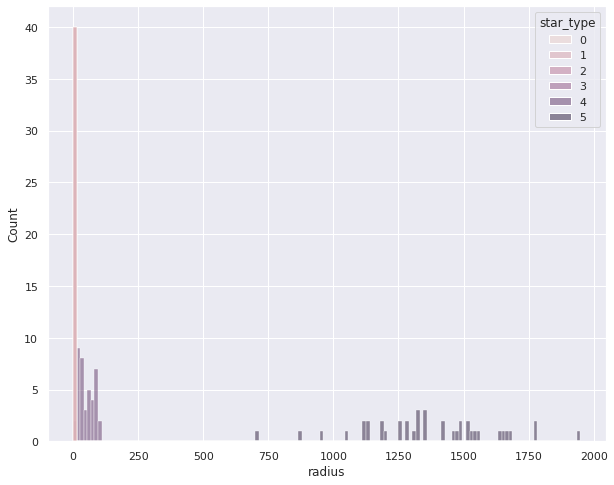

In [112]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'radius', hue= 'star_type')
plt.show()

* Boxplots:

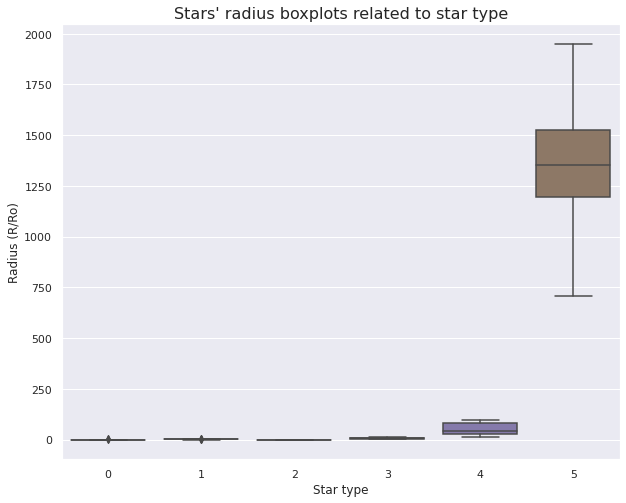

In [113]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_type', y= 'radius')
ax.set_title("Stars' radius boxplots related to star type", fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Radius (R/Ro)')
plt.show()

#### Absolute magnitude

* Mean, median and standard deviation:

In [114]:
df.groupby('star_type').agg(['mean', 'median', 'std'])['absolute_magnitude']

,mean,median,std
star_type,,,
0,17.563500,17.145,1.213111
1,12.539975,12.605,1.422816
2,12.582500,12.340,1.278386
3,-0.367425,-1.180,3.613592
4,-6.369925,-6.235,0.560051
5,-9.654250,-9.915,1.453605


* Histograms:

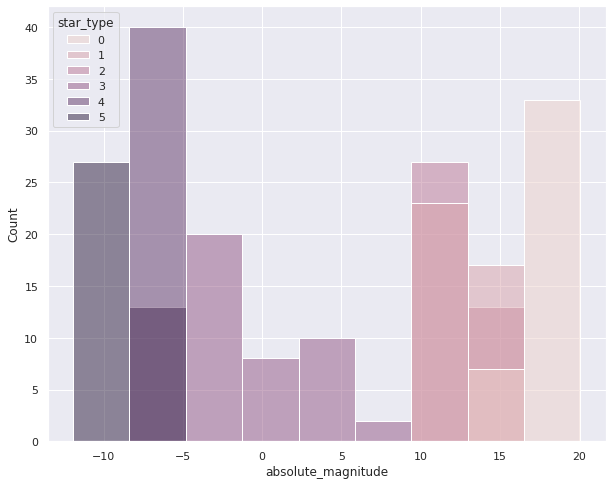

In [115]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'absolute_magnitude', hue= 'star_type')
plt.show()

* Boxplots:

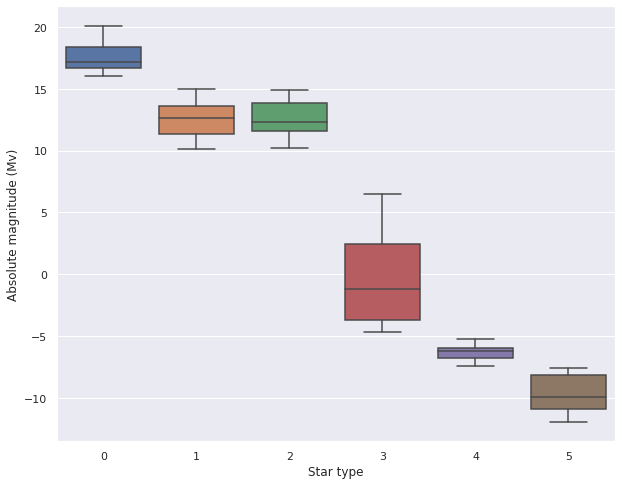

In [116]:
plt.figure(figsize= (10, 8 ))
ax = sns.boxplot(data= df, x= 'star_type', y= 'absolute_magnitude')
plt.xlabel('Star type')
plt.ylabel('Absolute magnitude (Mv)')
plt.show()

In [128]:
import statsmodels.api as sm

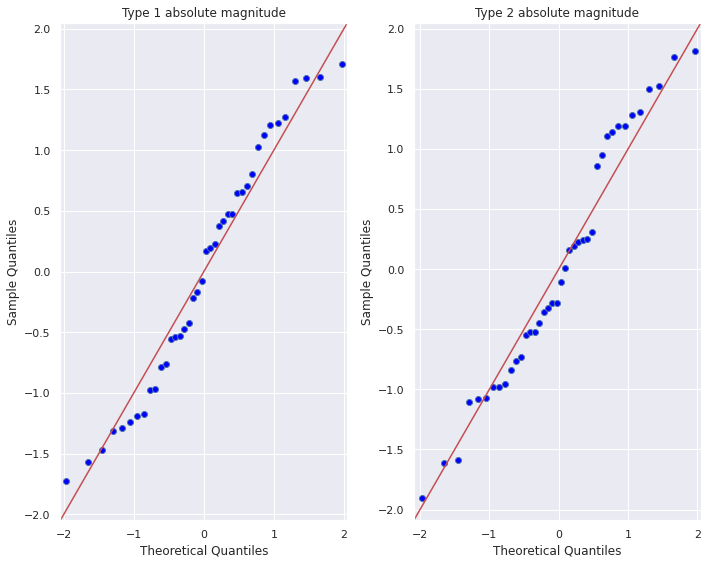

In [158]:
fig, ax = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sm.qqplot(data= df.query('star_type == 1')['absolute_magnitude'], line= '45', fit= True, ax= ax[0])
ax[0].set_title('Type 1 absolute magnitude')
ax2 = sm.qqplot(data= df.query('star_type == 2')['absolute_magnitude'], line= '45', fit= True, ax= ax[1])
ax[1].set_title('Type 2 absolute magnitude')
plt.tight_layout()

<AxesSubplot:xlabel='absolute_magnitude', ylabel='Count'>

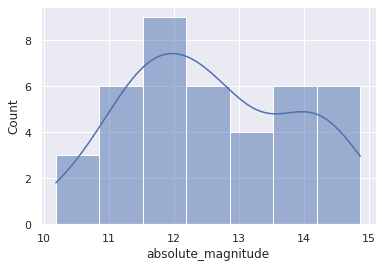

In [127]:
sns.histplot(df.query('star_type == 2')['absolute_magnitude'], kde= True)

In [120]:
from scipy.stats import shapiro

In [123]:
shapiro(df.query('star_type == 2')['absolute_magnitude'])

ShapiroResult(statistic=0.9562686681747437, pvalue=0.12470480799674988)

In [122]:
0.10877539962530136 <= 0.05

False

In [92]:
df.columns

Index(['temperature', 'luminosity', 'radius', 'absolute_magnitude',
       'star_type', 'star_color', 'spectral_class'],
      dtype='object')